# Introduction
- description problème de recherche
- hypothèse de recherche

In [50]:
library(ggplot2);library(fitdistrplus);library(corrplot)
library(randomForest);library(car)
library(caret)

# enlève les warnings / 0 pour les remettres
options(warn=-1)

In [51]:
df_train = read.csv("../data/Train.csv", header=TRUE)
df_testt = read.csv("../data/Test.csv", header=TRUE)

print(names(df_train))

 [1] "MSSubClass"    "MSZoning"      "LotFrontage"   "LotArea"      
 [5] "Street"        "LotShape"      "LandContour"   "Utilities"    
 [9] "LotConfig"     "LandSlope"     "Neighborhood"  "Condition1"   
[13] "Condition2"    "BldgType"      "HouseStyle"    "OverallQual"  
[17] "OverallCond"   "YearBuilt"     "YearRemodAdd"  "RoofStyle"    
[21] "RoofMatl"      "Exterior1st"   "Exterior2nd"   "MasVnrType"   
[25] "MasVnrArea"    "ExterQual"     "ExterCond"     "Foundation"   
[29] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[33] "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"    "BsmtUnfSF"    
[37] "TotalBsmtSF"   "Heating"       "HeatingQC"     "CentralAir"   
[41] "Electrical"    "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF" 
[45] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[49] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "KitchenQual"  
[53] "TotRmsAbvGrd"  "Functional"    "Fireplaces"    "GarageType"   
[57] "GarageYrBlt"   "GarageFinish

In [52]:
df_all <- rbind(df_train, df_testt)

dim(df_train)
dim(df_testt)
dim(df_all)

[1] 1095   75

[1] 365  75

[1] 1460   75

In [53]:
# affiche les 10 premières features et la target
str(df_train[,c(1:10, 75)])

'data.frame':	1095 obs. of  11 variables:
 $ MSSubClass : int  60 190 20 90 20 50 90 20 60 20 ...
 $ MSZoning   : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ LotFrontage: int  63 62 90 92 65 86 75 71 74 63 ...
 $ LotArea    : int  7875 10106 17217 12108 8450 11500 9825 9230 7472 8487 ...
 $ Street     : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ LotShape   : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 4 4 4 1 4 4 1 4 ...
 $ LandContour: Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities  : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig  : Factor w/ 5 levels "Corner","CulDSac",..: 5 5 5 5 5 5 5 1 2 3 ...
 $ LandSlope  : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ SalePrice  : int  180000 127500 84500 118000 179000 250000 100000 146000 184000 190000 ...


In [54]:
head(df_all[,c(1:10, 75)])

MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,SalePrice
60,RL,63,7875,Pave,Reg,Lvl,AllPub,Inside,Gtl,180000
190,RL,62,10106,Pave,Reg,Lvl,AllPub,Inside,Gtl,127500
20,RL,90,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,84500
90,RL,92,12108,Pave,Reg,Lvl,AllPub,Inside,Gtl,118000
20,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,179000
50,RL,86,11500,Pave,IR1,Lvl,AllPub,Inside,Gtl,250000


In [55]:
nrow(df_all) - nrow(unique(df_all))

[1] 0

In [56]:
any(is.na(df_all))
sum(is.na(df_all)) 

[1] FALSE

[1] 0

## commande pour compter les zéros et % des variables numériques ???
## suppression des variables numériques avec plus de 88% de zéros ???


---
# Analyse exploratoire
- graphes statistiques élémentaires pour les variables et paires de variables
- Cullen-Frey pour l’étude de la distribution de la variable cible.
- Décrivez vos résultats

## Compréhension de la target

summary statistics
------
min:  34900   max:  755000 
median:  163000 
mean:  180921.2 
estimated sd:  79442.5 
estimated skewness:  1.882876 
estimated kurtosis:  9.536282 

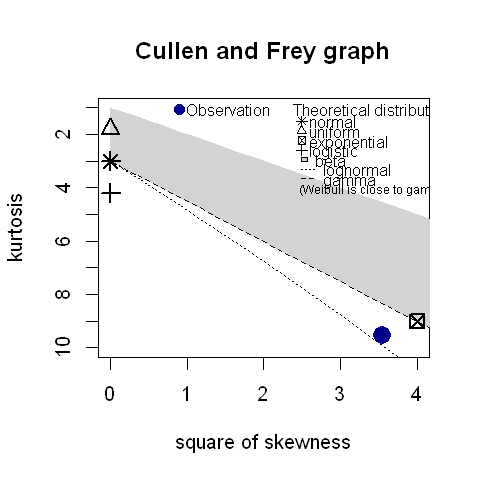

In [9]:
options(repr.plot.width = 4, repr.plot.height = 4)

descdist(df_all$SalePrice)

dddddddddddd

summary statistics
------
min:  10.46024   max:  13.53447 
median:  12.00151 
mean:  12.02405 
estimated sd:  0.3994519 
estimated skewness:  0.1213351 
estimated kurtosis:  3.809532 

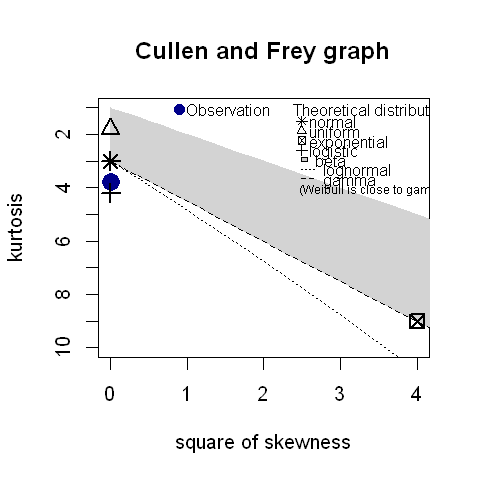

In [10]:
descdist(log(df_all$SalePrice))

La target est décalée vers la gauche (skewed), ceci pourrait s'expliquer par le fait que les prix les plus élevés ne sont pas abordables pour la plupart des gens

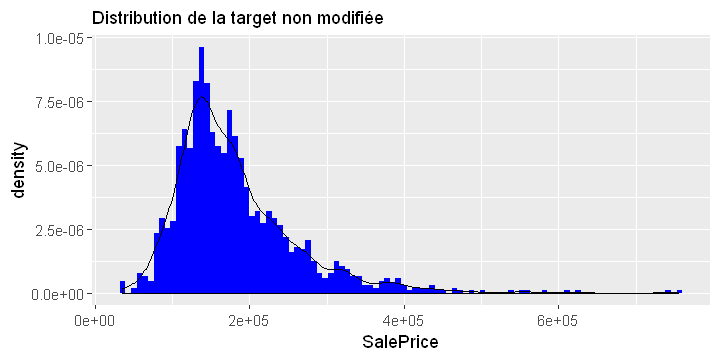

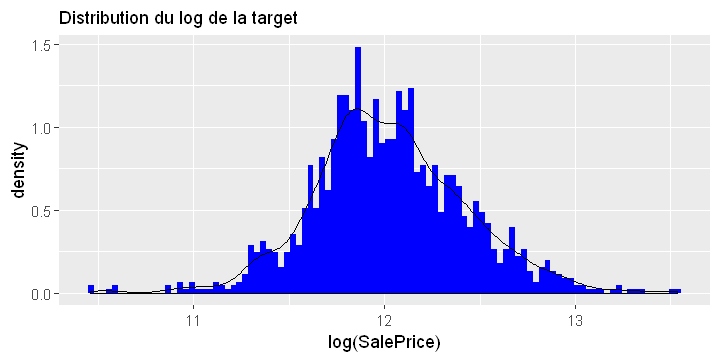

In [11]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(data = df_all[!is.na(df_all$SalePrice),], aes(x=SalePrice)) +
        geom_histogram(bins=100, fill="blue", aes(y = ..density..)) +
        geom_density() + labs(subtitle="Distribution de la target non modifiée")

ggplot(data=df_all[!is.na(df_all$SalePrice),], aes(x=log(SalePrice))) +
        geom_histogram(bins=100, fill="blue", aes(y = ..density..)) +
        geom_density() + labs(subtitle="Distribution du log de la target")

## Analyse de certaines features

recherche des points extremes sur les ggplot entre log(saleprice) et variables quanti


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


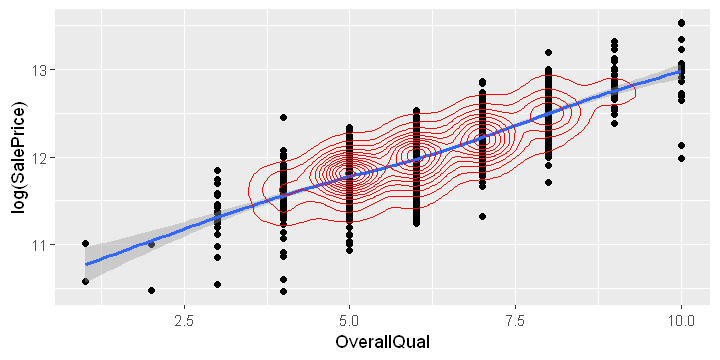

In [12]:
ggplot(df_all, aes(x=OverallQual, y=log(SalePrice))) + geom_point()+geom_smooth()+geom_density2d(color = "red")

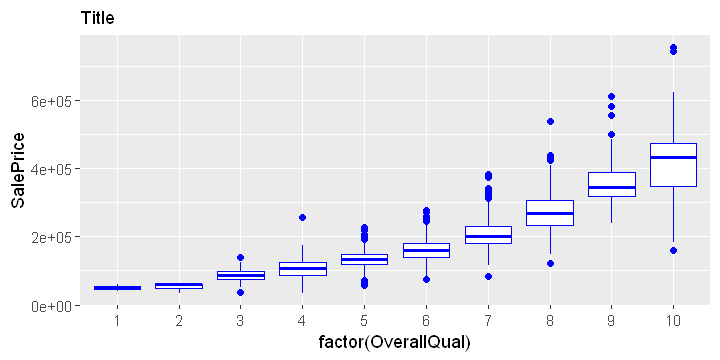

In [13]:
ggplot(data = df_all[!is.na(df_all$SalePrice),], aes(x=factor(OverallQual), y=SalePrice))+
        geom_boxplot(col='blue') + labs(subtitle="Title")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


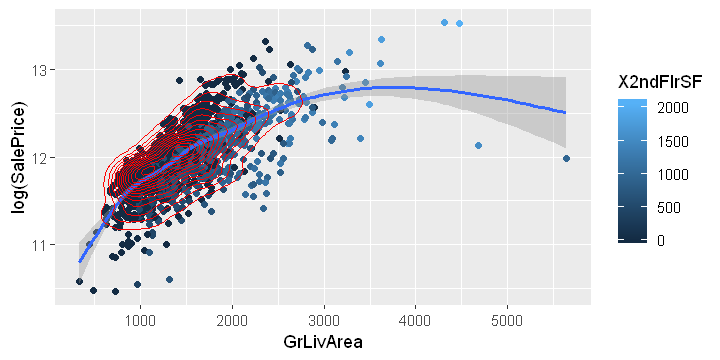

In [14]:
ggplot(df_all,aes(x = GrLivArea, y =log(SalePrice),color=X2ndFlrSF)) + geom_point()+geom_smooth()+geom_density2d(color = "red")

points à supprimer au-delà de 4000 pour  GrLivArea
justificatif : surface habitable (hors sous sol) -> 5000 square feet le plus grand mais avec un prix très en dessous = donc hors norme

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


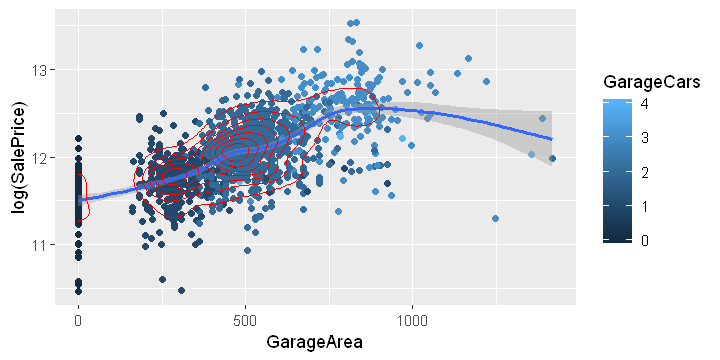

In [15]:
ggplot(df_all,aes(x = GarageArea, y =log(SalePrice),color=GarageCars)) + geom_point()+geom_smooth()+geom_density2d(color = "red")


retirer les 3 points extremes  au-delà de 1500 pour GarageArea surface de parking  
justificatif surface de parking les plus grandes mais un prix en dessous 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


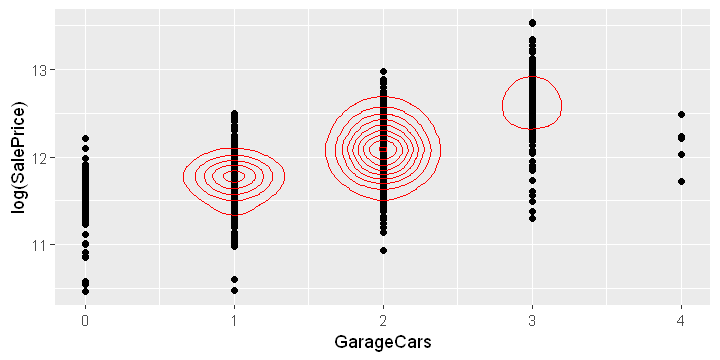

In [16]:
ggplot(df_all,aes(x = GarageCars, y =log(SalePrice))) + geom_point()+geom_smooth()+geom_density2d(color = "red")

rien à retirer

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


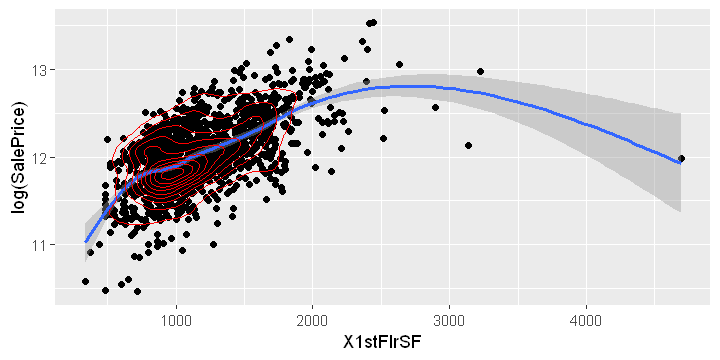

In [17]:
ggplot(df_all,aes(x = X1stFlrSF, y =log(SalePrice))) + geom_point()+geom_smooth()+geom_density2d(color = "red")

retirer le  point extremes  au-delà de 4500 pour X1stFlrSF  
justification surface au 1ier étage la plus elevée pour prix très bas

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


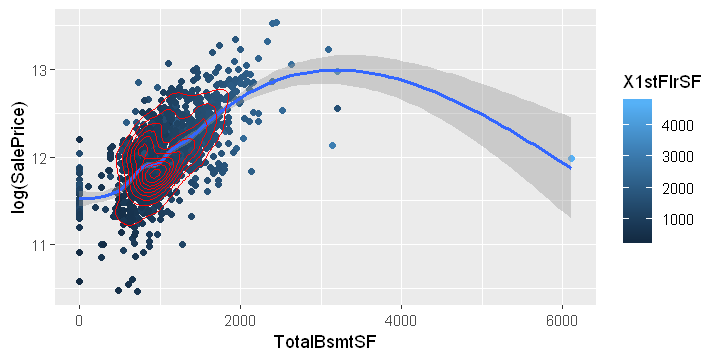

In [18]:
ggplot(df_all,aes(x = TotalBsmtSF, y =log(SalePrice),color=X1stFlrSF)) + geom_point()+geom_smooth()+geom_density2d(color = "red")

retirer le point extreme  à droite 6000 pour TotalBsmtSF  
tjrs la même logique ici total surface sous sol très elevé pour un prix décalé

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


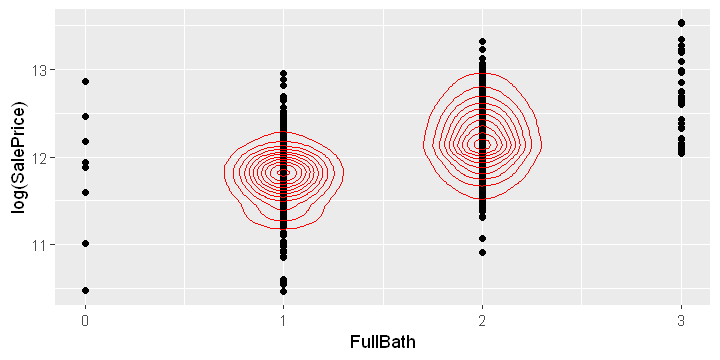

In [19]:
ggplot(df_all, aes(x = FullBath, y =log(SalePrice))) + geom_point()+geom_smooth()+geom_density2d(color = "red")

rien à retirer  pas de point extreme 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


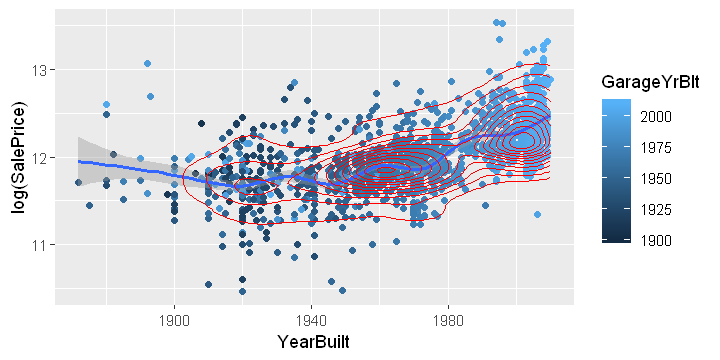

In [20]:
ggplot(df_all, aes(x = YearBuilt, y =log(SalePrice),color=GarageYrBlt)) + geom_point()+geom_smooth()+geom_density2d(color = "red")

rien à retirer  pas de point extreme 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


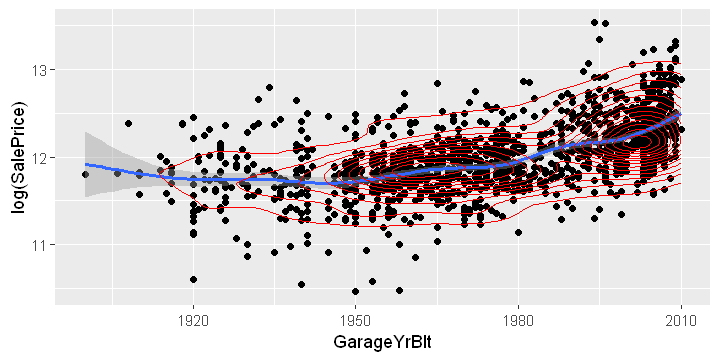

In [21]:
ggplot(df_all, aes(x = GarageYrBlt, y =log(SalePrice))) + geom_point()+geom_smooth()+geom_density2d(color = "red")

rien à retirer  pas de point extreme 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


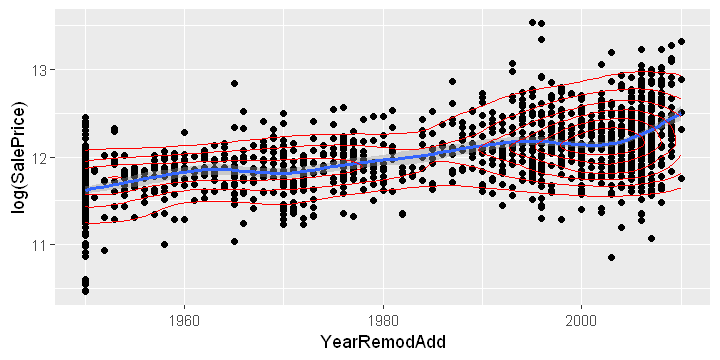

In [22]:
ggplot(df_all, aes(x = YearRemodAdd, y =log(SalePrice))) + geom_point()+geom_smooth()+geom_density2d(color = "red")

rien à retirer  pas de point extreme 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


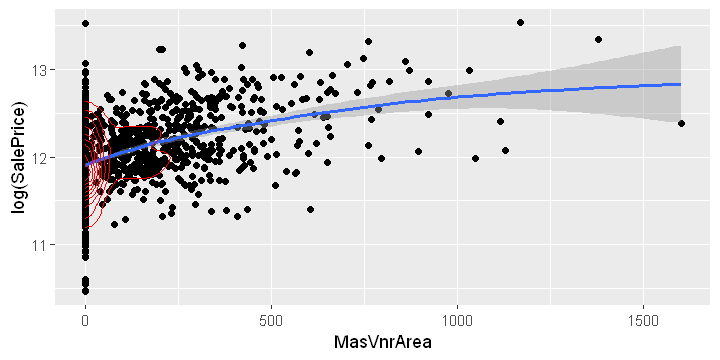

In [23]:
ggplot(df_all, aes(x = MasVnrArea, y =log(SalePrice))) + geom_point()+geom_smooth()+geom_density2d(color = "red")

point au-delà de 1250 à supprimer ??  
semble etre la surface de maconnerie 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


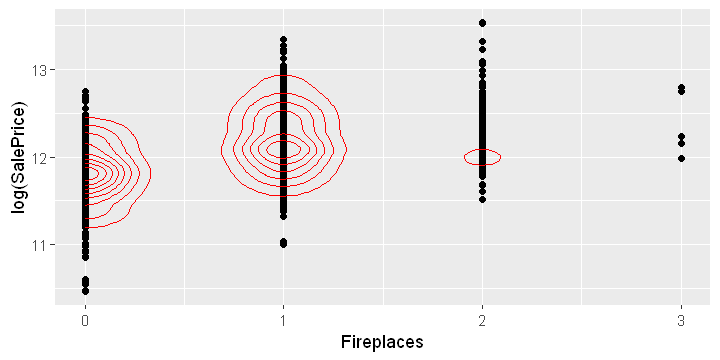

In [24]:
ggplot(df_all, aes(x = Fireplaces, y =log(SalePrice))) + geom_point()+geom_smooth()+geom_density2d(color = "red")

rien à retirer  pas de point extreme 

## Etudes des corrélations pour les features quantitatives
regardons dans un 1er temps les features numériques qui sont les plus fortement corrélées avec la target pour voir qu'elles sont celles qui ont le plus d'influcence.

Il y a 19 features numériques sur les 37 dont la corrélation est en valeur absolue supérieure à 0.3. Il est à noter que toute les corrélations sont positives car tous les chiffres sont positifs.

In [25]:
# index des vecteur de variables numériques
numericVars <- which(sapply(df_all, is.numeric))

# liste des noms correspondants à ces vecteurs
numericVarNames <- names(numericVars) 

# nombre
length(numericVars)

[1] 37

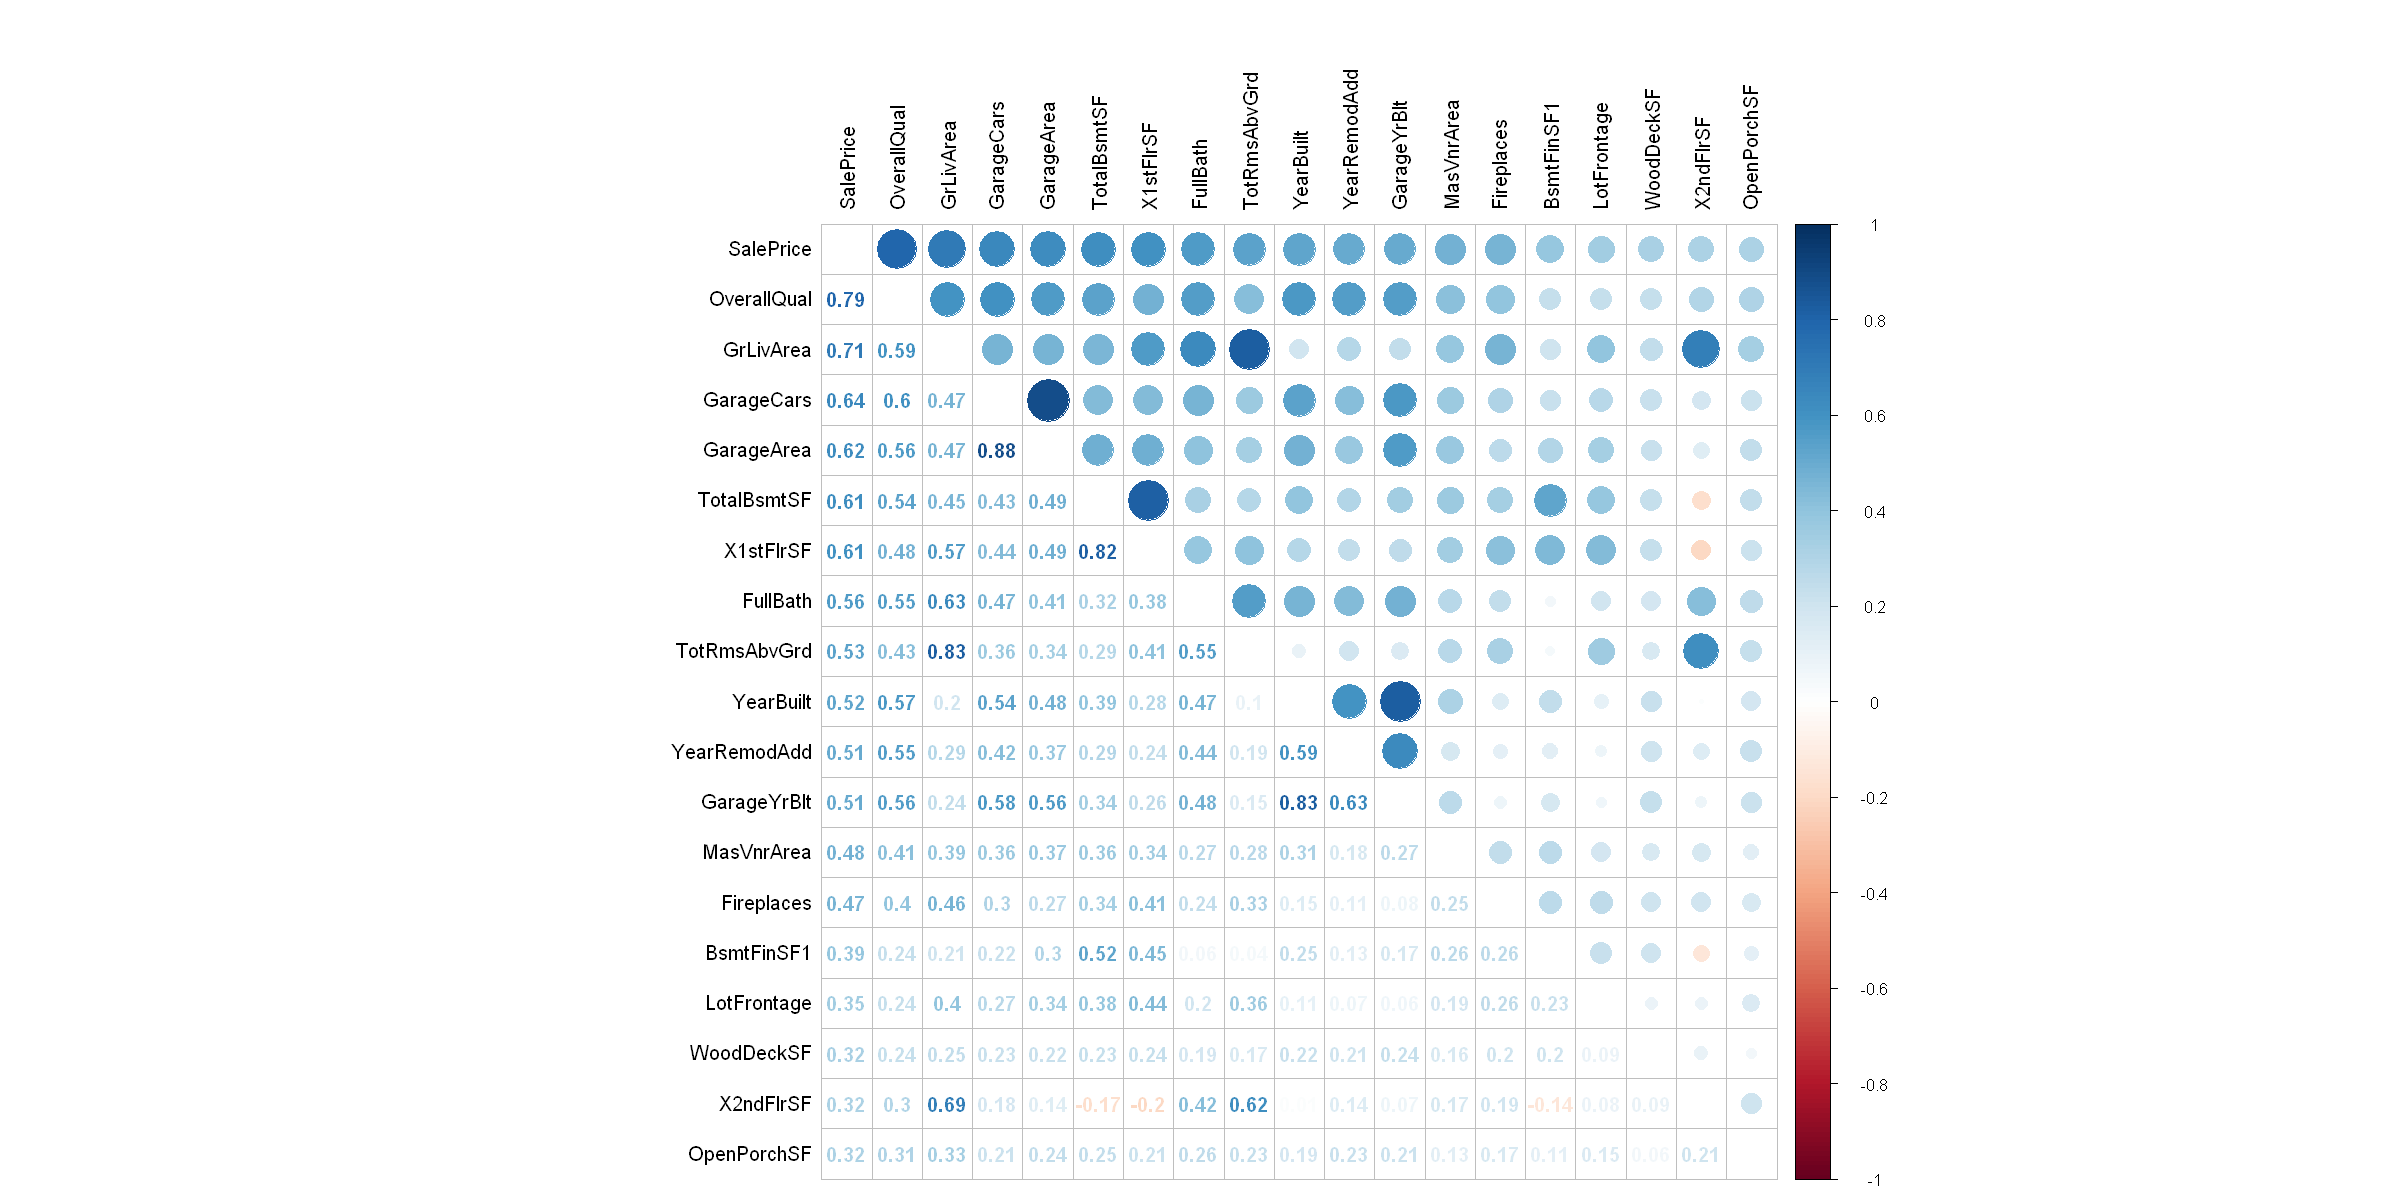

In [26]:
all_numVar <- df_all[, numericVars]

# correlations de toutes les features numériques
cor_numVar <- cor(all_numVar, use="pairwise.complete.obs") 

options(repr.plot.width = 20, repr.plot.height = 10)

# classement decroissant des corrélations avec la target
cor_sorted <- as.matrix(sort(cor_numVar[,'SalePrice'], decreasing = TRUE))

# filtre pour ne garder que les corrélations supérieurs en val. abs. à 0.3
CorHigh <- names(which(apply(cor_sorted, 1, function(x) (x > 0.3 | x < -0.3))))
cor_numVar <- cor_numVar[CorHigh, CorHigh]

# affiche le graphe
corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt")

### feature engineering focus sur les surfaces

corrélation entre la target et la surface au sol:

In [27]:
cor(df_all$SalePrice, df_all$GrLivArea, use= "pairwise.complete.obs")

[1] 0.7086245

même chose avec le sous-sol

In [28]:
cor(df_all$SalePrice, df_all$TotalBsmtSF, use= "pairwise.complete.obs")

[1] 0.6135806

la somme des deux présente une corrélation plus forte:

In [29]:
cor(df_all$SalePrice, df_all$GrLivArea + df_all$TotalBsmtSF, use= "pairwise.complete.obs")

[1] 0.7789588

ce qui est mis en évidence par le scatter plot suivant:

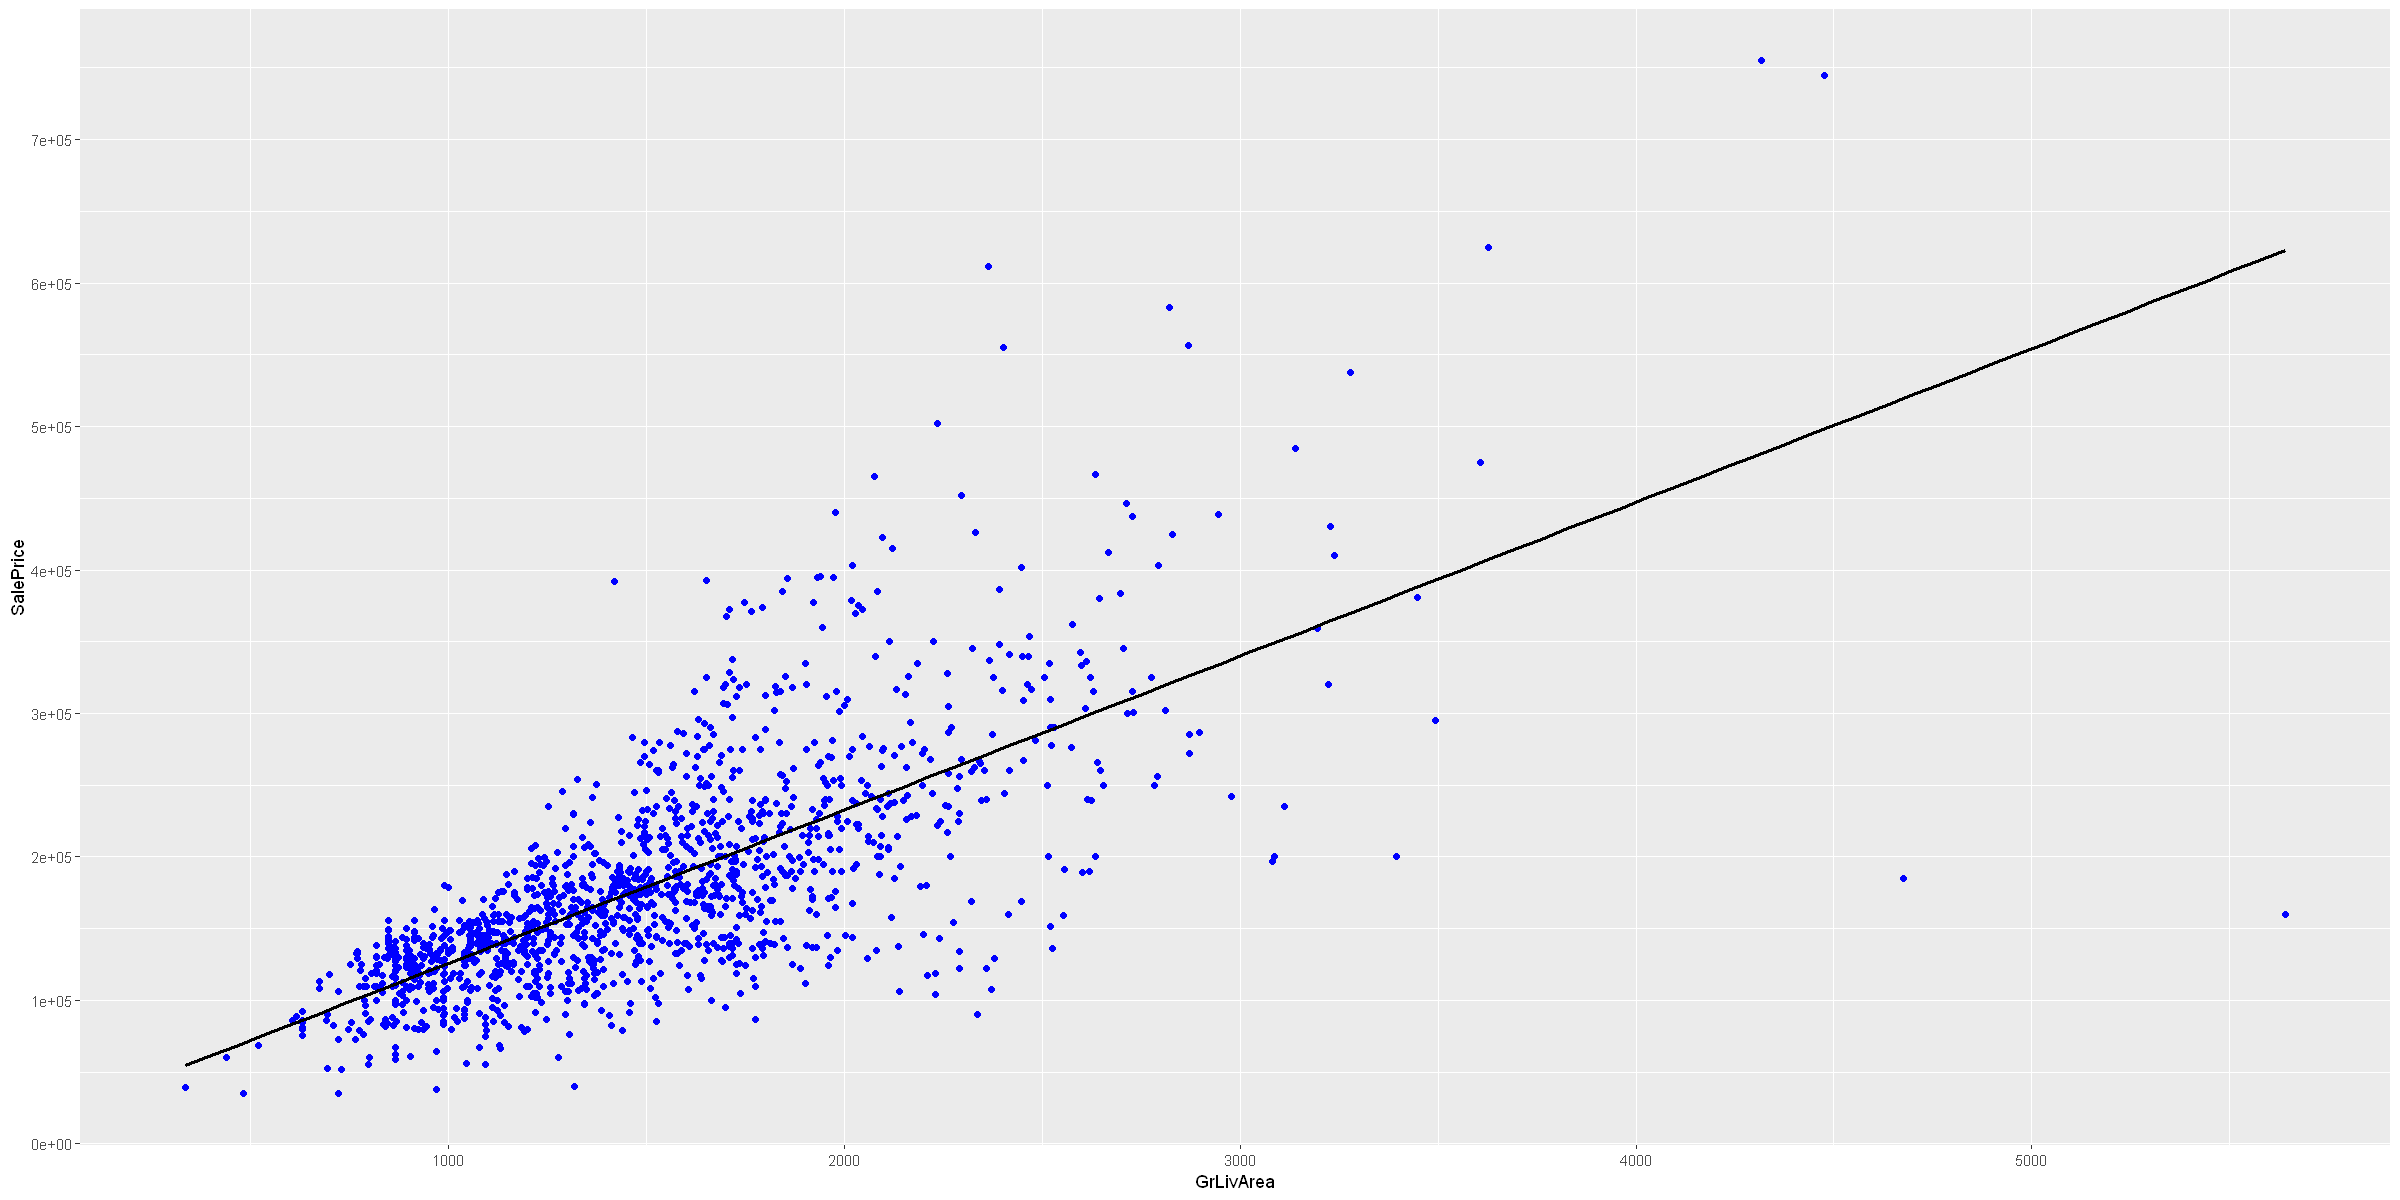

In [30]:
ggplot(data=df_all[!is.na(df_all$SalePrice),], aes(x=GrLivArea, y=SalePrice))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=100000))

même chose avec le 1er étage:

In [31]:
cor(df_all$SalePrice, df_all$X1stFlrSF, use= "pairwise.complete.obs")

[1] 0.6058522

In [32]:
cor(df_all$SalePrice, df_all$GrLivArea + df_all$X1stFlrSF, use= "pairwise.complete.obs")

[1] 0.749183

In [33]:
cor(df_all$SalePrice, df_all$GrLivArea + df_all$TotalBsmtSF + df_all$X1stFlrSF, use= "pairwise.complete.obs")

[1] 0.7577577

même chose avec "lot area":

In [34]:
cor(df_all$SalePrice, df_all$GrLivArea + df_all$TotalBsmtSF + df_all$LotArea, use= "pairwise.complete.obs")

[1] 0.3190823

In [35]:
cor(df_all$SalePrice, df_all$LotArea, use= "pairwise.complete.obs")

[1] 0.2638434

In [36]:
df_train[df_train$GrLivArea > 4000, ]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
317,60,RL,160,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
720,60,RL,313,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
819,60,RL,130,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


---

# Modélisation

## 1.baseline - regression à partir de toutes les features

Certains factors n'ont pas les memes levels ou le meme nombre de levels: ces variables qualitatives n'ont pas les memes mode dans les deux jeux de données:

In [57]:
str(df_train[,c('Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'Electrical')])

'data.frame':	1095 obs. of  6 variables:
 $ Condition2 : Factor w/ 6 levels "Artery","Feedr",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ RoofMatl   : Factor w/ 7 levels "ClyTile","CompShg",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Exterior1st: Factor w/ 13 levels "AsbShng","AsphShn",..: 11 12 11 11 11 3 2 7 5 11 ...
 $ Exterior2nd: Factor w/ 15 levels "AsbShng","AsphShn",..: 13 14 13 13 13 4 2 8 6 13 ...
 $ Heating    : Factor w/ 5 levels "GasA","GasW",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Electrical : Factor w/ 4 levels "FuseA","FuseF",..: 4 4 4 2 4 4 4 4 4 4 ...


In [58]:
str(df_testt[,c('Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'Electrical')])

'data.frame':	365 obs. of  6 variables:
 $ Condition2 : Factor w/ 6 levels "Artery","Feedr",..: 3 3 3 3 3 3 3 3 3 6 ...
 $ RoofMatl   : Factor w/ 4 levels "CompShg","Membran",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Exterior1st: Factor w/ 12 levels "AsbShng","BrkComm",..: 10 11 10 3 10 10 10 8 10 7 ...
 $ Exterior2nd: Factor w/ 14 levels "AsbShng","Brk Cmn",..: 12 14 12 14 12 12 12 9 12 8 ...
 $ Heating    : Factor w/ 6 levels "Floor","GasA",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Electrical : Factor w/ 5 levels "FuseA","FuseF",..: 5 5 5 2 5 5 5 5 5 5 ...


Dans l'immédiat nous ne les prenons pas en compte

In [59]:
train = subset(df_train, select=-c(Condition2, RoofMatl, Exterior1st, Exterior2nd, Heating, Electrical))
testt = subset(df_testt, select=-c(Condition2, RoofMatl, Exterior1st, Exterior2nd, Heating, Electrical))
dim(train)
dim(testt)

[1] 1095   69

[1] 365  69

In [60]:
train_b = subset(train, select=-c(SalePrice))
testt_b = subset(testt, select=-c(SalePrice))
dim(train_b)
dim(testt_b)

[1] 1095   68

[1] 365  68

In [61]:
model_baseline = lm(log(train$SalePrice)~., data=train_b)
summary(model_baseline)


Call:
lm(formula = log(train$SalePrice) ~ ., data = train_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99779 -0.05467  0.00123  0.06131  0.36362 

Coefficients: (3 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           9.857e+00  6.384e+00   1.544 0.122928    
MSSubClass           -8.879e-04  4.916e-04  -1.806 0.071222 .  
MSZoningFV            3.492e-01  8.083e-02   4.321 1.72e-05 ***
MSZoningRH            3.053e-01  8.232e-02   3.709 0.000220 ***
MSZoningRL            3.062e-01  7.144e-02   4.286 2.01e-05 ***
MSZoningRM            2.659e-01  6.682e-02   3.979 7.47e-05 ***
LotFrontage          -1.060e-03  2.677e-04  -3.960 8.08e-05 ***
LotArea               2.078e-06  6.486e-07   3.204 0.001404 ** 
StreetPave            1.093e-01  7.071e-02   1.546 0.122509    
LotShapeIR2           3.656e-02  2.658e-02   1.376 0.169279    
LotShapeIR3          -1.405e-01  5.554e-02  -2.530 0.011577 *  
LotShapeRe

### Validation du modèle ???

In [62]:
y_train_pred = (predict(model_baseline, newdata=train_b))
y_testt_pred = (predict(model_baseline, newdata=testt_b))


RMSE_train = c(sqrt(mean((exp(y_train_pred)-train$SalePrice)^2)))
RMSE_testt = c(sqrt(mean((exp(y_testt_pred)-testt$SalePrice)^2)))

print("RMSE sur le dataset de train:"); print(RMSE_train, digits=5)

print("RMSE sur le dataset de test:"); print(RMSE_testt, digits=5)

[1] "RMSE sur le dataset de train:"
[1] 23707
[1] "RMSE sur le dataset de test:"
[1] 26677


Comparaison des erreurs par rapport à la moyenne:

In [63]:
summary(df_all$SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  129975  163000  180921  214000  755000 

Cela représente une plage d'erreur de 15% soit + ou - 7.5% par rapport à la moyenne:

In [64]:
26677/180921  

[1] 0.1474511

## 2.regression à partir de toutes les features - remplacement des outliers

In [65]:
outlierTest(model_baseline)

       rstudent unadjusted p-value Bonferonni p
720  -13.451273         9.0116e-38   9.7866e-35
819   -8.974342         1.5837e-18   1.7199e-15
743   -6.068188         1.8915e-09   2.0542e-06
814   -5.249783         1.8934e-07   2.0563e-04
1079  -4.919100         1.0304e-06   1.1190e-03
661   -4.303352         1.8633e-05   2.0236e-02

In [66]:
train = subset(df_train, select=-c(Condition2, RoofMatl, Exterior1st, Exterior2nd, Heating, Electrical))
testt = subset(df_testt, select=-c(Condition2, RoofMatl, Exterior1st, Exterior2nd, Heating, Electrical))

# on enlève les variables fortement corrélées
#train = subset(train, select=-c(YearRemodAdd, GarageYrBlt, GarageArea, GarageCond, TotalBsmtSF, TotRmsAbvGrd, BsmtFinSF1))
#testt = subset(testt, select=-c(YearRemodAdd, GarageYrBlt, GarageArea, GarageCond, TotalBsmtSF, TotRmsAbvGrd, BsmtFinSF1))

# outliers issue de bonferonni
train = train[-c(720,819,743,661,814),]
testt = testt[-c(720,819,743,661,814),]

# outliers mis en évidence lors de l'analyse
train = subset(train, GrLivArea < 4000)
train = subset(train, GarageArea < 1250)
train = subset(train, TotalBsmtSF < 4000)
train = subset(train, MasVnrArea < 1000)
train = subset(train, TotalBsmtSF < 4000)
train = subset(train, X1stFlrSF < 4500)
train = subset(train, TotalBsmtSF < 6000)

dim(train)
dim(testt)

[1] 1084   69

[1] 365  69

In [67]:
train_b = subset(train, select=-c(SalePrice))
testt_b = subset(testt, select=-c(SalePrice))
dim(train_b)
dim(testt_b)

[1] 1084   68

[1] 365  68

In [68]:
model_outliers = lm(log(train$SalePrice)~., data=train_b)
summary(model_outliers)


Call:
lm(formula = log(train$SalePrice) ~ ., data = train_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55536 -0.04482  0.00417  0.04947  0.39529 

Coefficients: (3 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.640e+00  5.016e+00   1.125 0.261078    
MSSubClass           -4.618e-04  3.843e-04  -1.201 0.229891    
MSZoningFV            2.146e-01  6.718e-02   3.194 0.001452 ** 
MSZoningRH            1.465e-01  6.888e-02   2.126 0.033746 *  
MSZoningRL            1.702e-01  6.058e-02   2.810 0.005063 ** 
MSZoningRM            1.201e-01  5.737e-02   2.094 0.036521 *  
LotFrontage           7.975e-05  2.197e-04   0.363 0.716671    
LotArea               2.832e-06  5.124e-07   5.527 4.27e-08 ***
StreetPave            1.545e-01  5.548e-02   2.785 0.005464 ** 
LotShapeIR2           1.862e-02  2.079e-02   0.895 0.370896    
LotShapeIR3          -8.121e-03  4.513e-02  -0.180 0.857241    
LotShapeRe

### Validation du modèle ???

In [69]:
y_train_pred = (predict(model_outliers, newdata=train_b))
y_testt_pred = (predict(model_outliers, newdata=testt_b))


RMSE_train = c(sqrt(mean((exp(y_train_pred)-train$SalePrice)^2)))
RMSE_testt = c(sqrt(mean((exp(y_testt_pred)-testt$SalePrice)^2)))

print("RMSE sur le dataset de train:"); print(RMSE_train, digits=5)

print("RMSE sur le dataset de test:"); print(RMSE_testt, digits=5)

[1] "RMSE sur le dataset de train:"
[1] 16303
[1] "RMSE sur le dataset de test:"
[1] 21690


Comparaison des erreurs par rapport à la moyenne:

In [70]:
summary(df_all$SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  129975  163000  180921  214000  755000 

Cela représente une plage d'erreur de 15% soit + ou - 7.5% par rapport à la moyenne:

In [71]:
21690/180921  

[1] 0.1198866

## 3.selection de features
modèle avec les 7 features classées par importance selon le randomforrest

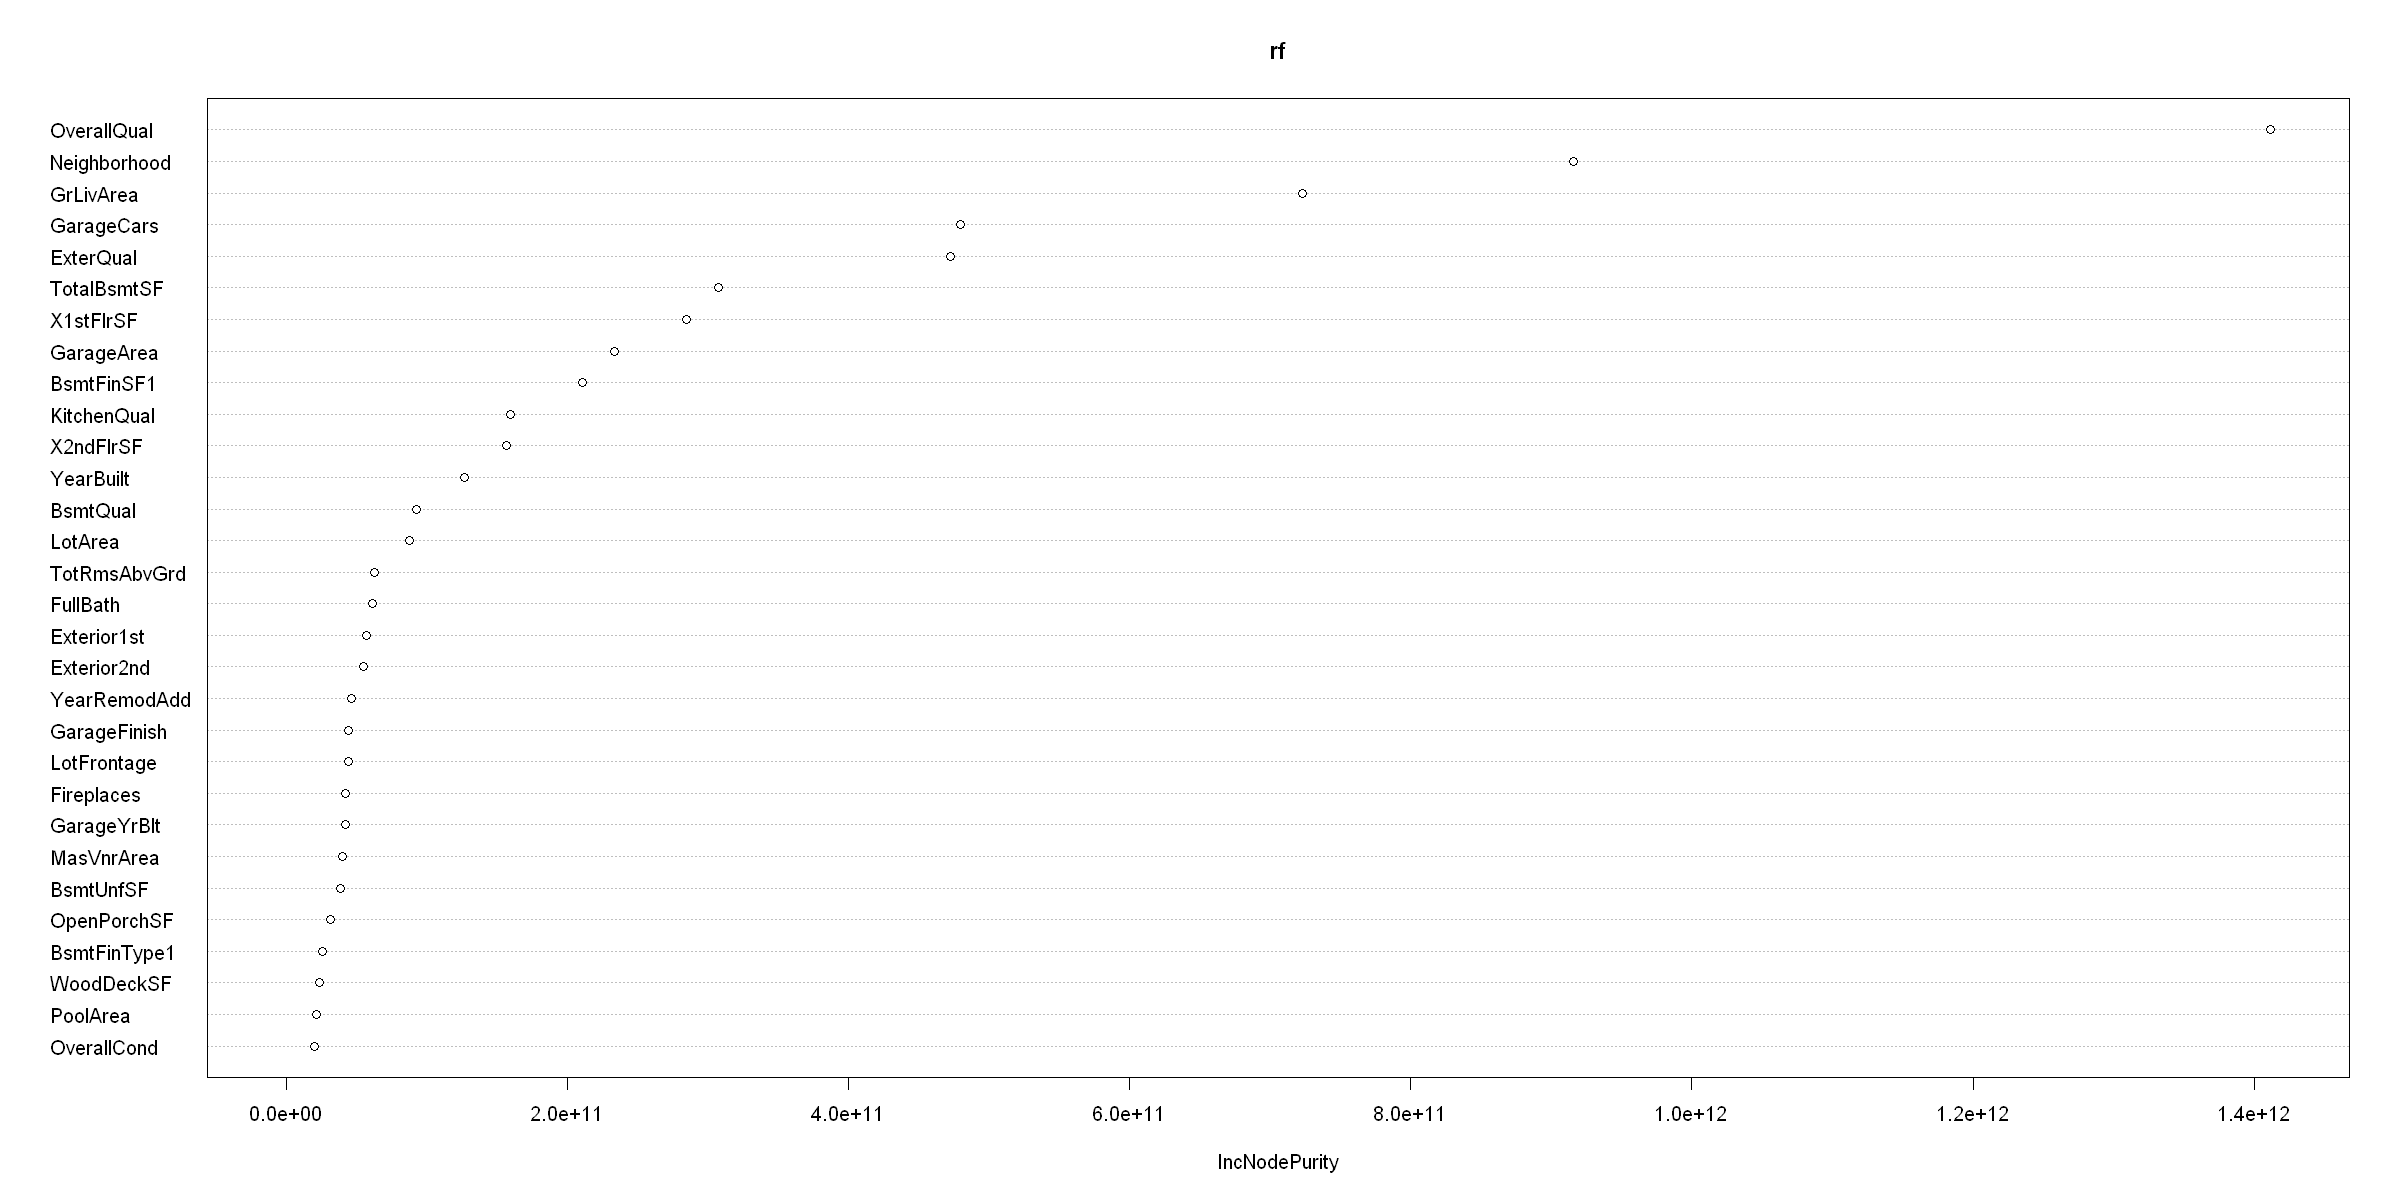

In [72]:
rf = randomForest(SalePrice~ .,data=df_train)
varImpPlot(rf)

In [73]:
train = subset(df_train, select=-c(Condition2, RoofMatl, Exterior1st, Exterior2nd, Heating, Electrical))
testt = subset(df_testt, select=-c(Condition2, RoofMatl, Exterior1st, Exterior2nd, Heating, Electrical))

# outliers issue de bonferonni
train = train[-c(720,819,743,661,814),]
testt = testt[-c(720,819,743,661,814),]

# outliers mis en évidence lors de l'analyse
train = subset(train, GrLivArea < 4000)
train = subset(train, GarageArea < 1250)
train = subset(train, TotalBsmtSF < 4000)
train = subset(train, MasVnrArea < 1000)
train = subset(train, TotalBsmtSF < 4000)
train = subset(train, X1stFlrSF < 4500)
train = subset(train, TotalBsmtSF < 6000)


train = (subset(train, select=c(OverallQual, Neighborhood, GrLivArea, GarageCars, ExterQual, TotalBsmtSF, X1stFlrSF, GarageArea, BsmtFinSF1, KitchenQual, X2ndFlrSF, BsmtQual, SalePrice)))
testt = (subset(testt, select=c(OverallQual, Neighborhood, GrLivArea, GarageCars, ExterQual, TotalBsmtSF, X1stFlrSF, GarageArea, BsmtFinSF1, KitchenQual, X2ndFlrSF, BsmtQual, SalePrice)))

head(train)

OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,TotalBsmtSF,X1stFlrSF,GarageArea,BsmtFinSF1,KitchenQual,X2ndFlrSF,BsmtQual,SalePrice
7,Gilbert,1509,2,Gd,783,807,393,0,Gd,702,Gd,180000
5,Edwards,1355,0,TA,644,808,0,351,TA,547,TA,127500
5,Mitchel,1140,0,TA,1140,1140,0,0,TA,0,Gd,84500
4,Edwards,1440,0,TA,1440,1440,0,133,Fa,0,TA,118000
7,SawyerW,1349,2,TA,1349,1349,539,0,TA,0,Gd,179000
7,Crawfor,2057,1,Gd,1017,1020,180,223,Gd,1037,Gd,250000


In [74]:
# pour l'entrainement on enlève la target
train_b = subset(train, select=-c(SalePrice))
testt_b = subset(testt, select=-c(SalePrice))

head(train_b)

OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,TotalBsmtSF,X1stFlrSF,GarageArea,BsmtFinSF1,KitchenQual,X2ndFlrSF,BsmtQual
7,Gilbert,1509,2,Gd,783,807,393,0,Gd,702,Gd
5,Edwards,1355,0,TA,644,808,0,351,TA,547,TA
5,Mitchel,1140,0,TA,1140,1140,0,0,TA,0,Gd
4,Edwards,1440,0,TA,1440,1440,0,133,Fa,0,TA
7,SawyerW,1349,2,TA,1349,1349,539,0,TA,0,Gd
7,Crawfor,2057,1,Gd,1017,1020,180,223,Gd,1037,Gd


In [75]:
dim(train);dim(train_b)
dim(testt);dim(testt_b)

[1] 1084   13

[1] 1084   12

[1] 365  13

[1] 365  12

In [76]:
model_select_feat = lm(log(train$SalePrice)~., data=train_b)
summary(model_select_feat)


Call:
lm(formula = log(train$SalePrice) ~ ., data = train_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62083 -0.05687  0.01066  0.06948  0.47677 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.120e+01  6.362e-02 176.045  < 2e-16 ***
OverallQual          6.776e-02  5.402e-03  12.545  < 2e-16 ***
NeighborhoodBlueste -5.096e-02  1.301e-01  -0.392 0.695425    
NeighborhoodBrDale  -2.444e-01  5.687e-02  -4.298 1.89e-05 ***
NeighborhoodBrkSide -5.226e-02  4.193e-02  -1.246 0.212945    
NeighborhoodClearCr  8.001e-02  4.550e-02   1.758 0.078971 .  
NeighborhoodCollgCr  2.525e-03  3.638e-02   0.069 0.944675    
NeighborhoodCrawfor  1.043e-01  4.132e-02   2.525 0.011729 *  
NeighborhoodEdwards -1.020e-01  3.984e-02  -2.560 0.010598 *  
NeighborhoodGilbert  4.536e-02  3.869e-02   1.172 0.241294    
NeighborhoodIDOTRR  -1.635e-01  4.545e-02  -3.598 0.000336 ***
NeighborhoodMeadowV -2.519e-01  5.276e-02  -4.774 2.06e-06 ***


Prédictions et calcul des RMSE:

In [77]:
y_train_pred = (predict(model_select_feat, newdata=train_b))
y_testt_pred = (predict(model_select_feat, newdata=testt_b))


RMSE_train = c(sqrt(mean((exp(y_train_pred)-train$SalePrice)^2)))
RMSE_testt = c(sqrt(mean((exp(y_testt_pred)-testt$SalePrice)^2)))

print("RMSE sur le dataset de train:"); print(RMSE_train, digits=5)

print("RMSE sur le dataset de test:"); print(RMSE_testt, digits=5)

[1] "RMSE sur le dataset de train:"
[1] 22110
[1] "RMSE sur le dataset de test:"
[1] 26143


## 4.selection de features + suppression des outliers


In [78]:
train = (subset(df_train, select=c(OverallQual, Neighborhood, GrLivArea, GarageCars, ExterQual, TotalBsmtSF, X1stFlrSF, GarageArea, BsmtFinSF1, KitchenQual, X2ndFlrSF, BsmtQual, SalePrice)))
testt = (subset(df_testt, select=c(OverallQual, Neighborhood, GrLivArea, GarageCars, ExterQual, TotalBsmtSF, X1stFlrSF, GarageArea, BsmtFinSF1, KitchenQual, X2ndFlrSF, BsmtQual, SalePrice)))

In [79]:
# pour l'entrainement on enlève la target
train_b = subset(train, select=-c(SalePrice))
testt_b = subset(testt, select=-c(SalePrice))

head(train_b)

OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,TotalBsmtSF,X1stFlrSF,GarageArea,BsmtFinSF1,KitchenQual,X2ndFlrSF,BsmtQual
7,Gilbert,1509,2,Gd,783,807,393,0,Gd,702,Gd
5,Edwards,1355,0,TA,644,808,0,351,TA,547,TA
5,Mitchel,1140,0,TA,1140,1140,0,0,TA,0,Gd
4,Edwards,1440,0,TA,1440,1440,0,133,Fa,0,TA
7,SawyerW,1349,2,TA,1349,1349,539,0,TA,0,Gd
7,Crawfor,2057,1,Gd,1017,1020,180,223,Gd,1037,Gd


In [80]:
model_select_feat = lm(log(train$SalePrice)~., data=train_b)
summary(model_select_feat)


Call:
lm(formula = log(train$SalePrice) ~ ., data = train_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77259 -0.05827  0.01111  0.07818  0.46437 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.119e+01  7.714e-02 145.109  < 2e-16 ***
OverallQual          7.432e-02  6.544e-03  11.358  < 2e-16 ***
NeighborhoodBlueste -5.949e-02  1.594e-01  -0.373 0.709011    
NeighborhoodBrDale  -2.628e-01  6.959e-02  -3.776 0.000168 ***
NeighborhoodBrkSide -5.360e-02  5.131e-02  -1.045 0.296464    
NeighborhoodClearCr  1.473e-01  5.554e-02   2.653 0.008108 ** 
NeighborhoodCollgCr  3.724e-02  4.450e-02   0.837 0.402839    
NeighborhoodCrawfor  1.476e-01  5.050e-02   2.922 0.003551 ** 
NeighborhoodEdwards -1.255e-01  4.869e-02  -2.577 0.010095 *  
NeighborhoodGilbert  4.317e-02  4.737e-02   0.911 0.362313    
NeighborhoodIDOTRR  -1.882e-01  5.534e-02  -3.401 0.000697 ***
NeighborhoodMeadowV -2.587e-01  6.455e-02  -4.007 6.57e-05 ***


Prédictions et calcul des RMSE:

In [81]:
y_train_pred = (predict(model_select_feat, newdata=train_b))
y_testt_pred = (predict(model_select_feat, newdata=testt_b))


RMSE_train = c(sqrt(mean((exp(y_train_pred)-train$SalePrice)^2)))
RMSE_testt = c(sqrt(mean((exp(y_testt_pred)-testt$SalePrice)^2)))

print("RMSE sur le dataset de train:"); print(RMSE_train, digits=5)

print("RMSE sur le dataset de test:"); print(RMSE_testt, digits=5)

[1] "RMSE sur le dataset de train:"
[1] 36363
[1] "RMSE sur le dataset de test:"
[1] 29176


## 5. modéle sans outliers & normalisé

essai en fusionnant les train & test

In [ ]:
train = subset(df_train, select=-c(Condition2, RoofMatl, Exterior1st, Exterior2nd, Heating, Electrical))
testt = subset(df_testt, select=-c(Condition2, RoofMatl, Exterior1st, Exterior2nd, Heating, Electrical))

# outliers issue de bonferonni
train = train[-c(720,819,743,661,814),]
testt = testt[-c(720,819,743,661,814),]

# outliers mis en évidence lors de l'analyse
train = subset(train, GrLivArea < 4000)
train = subset(train, GarageArea < 1250)
train = subset(train, TotalBsmtSF < 4000)
train = subset(train, MasVnrArea < 1000)
train = subset(train, TotalBsmtSF < 4000)
train = subset(train, X1stFlrSF < 4500)
train = subset(train, TotalBsmtSF < 6000)

dim(train)
dim(testt)

In [ ]:
all_tmp <- rbind(train, testt)

In [ ]:
numericVars <- which(sapply(all_tmp, is.numeric)) #index vector numeric variables
numericVarNames <- names(numericVars)
print(numericVarNames)

In [ ]:
DFnumeric <- all_tmp[, names(all_tmp) %in% numericVarNames]

DFtarget = subset(DFnumeric, select=c(SalePrice))
DFnumeric = subset(DFnumeric, select=-c(SalePrice))

DFfactors <- all_tmp[, !(names(all_tmp) %in% numericVarNames)]

dim(DFnumeric)
dim(DFtarget)
dim(DFfactors)

In [ ]:
PreNum <- preProcess(DFnumeric, method=c("center", "scale"))
print(PreNum)

In [ ]:
DFnorm <- predict(PreNum, DFnumeric)
dim(DFnorm)

In [ ]:
DFdummies <- as.data.frame(model.matrix(~.-1, DFfactors))

In [ ]:
all_tmp <- cbind(DFnorm, DFdummies, DFtarget) #combining all (now numeric) predictors into one dataframe 
dim(all_tmp)

In [ ]:
train = all_tmp[0:1084, ]
testt = all_tmp[1085:1449, ]

In [ ]:
dim(train)
dim(testt)

train_b = subset(train, select=-c(SalePrice))
testt_b = subset(testt, select=-c(SalePrice))

dim(train_b)
dim(testt_b)

#tail(train)
#head(testt)

In [ ]:
model_scale = lm(log(train$SalePrice)~., data=train_b)
summary(model_scale)

In [ ]:
y_train_pred = (predict(model_select_feat, newdata=train_b))
y_testt_pred = (predict(model_select_feat, newdata=testt_b))


RMSE_train = c(sqrt(mean((exp(y_train_pred)-train$SalePrice)^2)))
RMSE_testt = c(sqrt(mean((exp(y_testt_pred)-testt$SalePrice)^2)))

print("RMSE sur le dataset de train:"); print(RMSE_train, digits=5)

print("RMSE sur le dataset de test:"); print(RMSE_testt, digits=5)

---
# essai mais pb résultat

récupération des lignes qui sont mises en évidence comme outliers selon les valeurs de Bonderonni:

In [ ]:
train = subset(df_train, select=-c(Condition2, RoofMatl, Exterior1st, Exterior2nd, Heating, Electrical))
testt = subset(df_testt, select=-c(Condition2, RoofMatl, Exterior1st, Exterior2nd, Heating, Electrical))

# outliers issue de bonferonni
train = train[-c(720,819,743,661,814),]
testt = testt[-c(720,819,743,661,814),]

# outliers mis en évidence lors de l'analyse
train = subset(train, GrLivArea < 4000)
train = subset(train, GarageArea < 1250)
train = subset(train, TotalBsmtSF < 4000)
train = subset(train, MasVnrArea < 1000)
train = subset(train, TotalBsmtSF < 4000)
train = subset(train, X1stFlrSF < 4500)
train = subset(train, TotalBsmtSF < 6000)

dim(train)
dim(testt)

In [ ]:
numericVars <- which(sapply(train, is.numeric)) #index vector numeric variables
numericVarNames <- names(numericVars)
print(numericVarNames)

In [ ]:
DFnumeric <- train[, names(train) %in% numericVarNames]

DFtarget = subset(DFnumeric, select=c(SalePrice))
DFnumeric = subset(DFnumeric, select=-c(SalePrice))

DFfactors <- train[, !(names(train) %in% numericVarNames)]

dim(DFnumeric)
dim(DFtarget)
dim(DFfactors)

In [ ]:
PreNum <- preProcess(DFnumeric, method=c("center", "scale"))
print(PreNum)

In [ ]:
DFnorm <- predict(PreNum, DFnumeric)
dim(DFnorm)

In [ ]:
DFdummies <- as.data.frame(model.matrix(~.-1, DFfactors))

In [ ]:
train <- cbind(DFnorm, DFdummies, DFtarget) #combining all (now numeric) predictors into one dataframe 
dim(train)

meme chose pour le test

In [ ]:
DFnumeric <- testt[, names(testt) %in% numericVarNames]

DFtarget = subset(DFnumeric, select=c(SalePrice))
DFnumeric = subset(DFnumeric, select=-c(SalePrice))

DFfactors <- testt[, !(names(testt) %in% numericVarNames)]

dim(DFnumeric)
dim(DFtarget)
dim(DFfactors)

In [ ]:
PreNum <- preProcess(DFnumeric, method=c("center", "scale"))
print(PreNum)

In [ ]:
DFnorm <- predict(PreNum, DFnumeric)
dim(DFnorm)

In [ ]:
DFdummies <- as.data.frame(model.matrix(~.-1, DFfactors))

In [ ]:
testt <- cbind(DFnorm, DFfactors, DFtarget) #combining all (now numeric) predictors into one dataframe 
dim(testt)

préparation des données

In [ ]:
dim(train)
dim(testt)

train_b = subset(train, select=-c(SalePrice))
testt_b = subset(testt, select=-c(SalePrice))

dim(train_b)
dim(testt_b)

# Feat eng

neighboorhood

In [ ]:
ggplot(df_all[!is.na(df_all$SalePrice),], aes(x=Neighborhood, y=SalePrice)) +
        geom_bar(stat='summary', fun.y = "median", fill='blue') +
        theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=50000)) +
        geom_label(stat = "count", aes(label = ..count.., y = ..count..), size=3) +
        geom_hline(yintercept=163000, linetype="dashed", color = "red")

In [ ]:
ggplot(data=df_all, aes(x=Neighborhood)) +
        geom_histogram(stat='count')+
        geom_label(stat = "count", aes(label = ..count.., y = ..count..), size=3)+
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
train$NeighRich[train$Neighborhood %in% c('StoneBr', 'NridgHt', 'NoRidge')] <- 2
testt$NeighRich[testt$Neighborhood %in% c('StoneBr', 'NridgHt', 'NoRidge')] <- 2

train$NeighRich[!train$Neighborhood %in% c('MeadowV', 'IDOTRR', 'BrDale', 'StoneBr', 'NridgHt', 'NoRidge')] <- 1
testt$NeighRich[!testt$Neighborhood %in% c('MeadowV', 'IDOTRR', 'BrDale', 'StoneBr', 'NridgHt', 'NoRidge')] <- 1

train$NeighRich[train$Neighborhood %in% c('MeadowV', 'IDOTRR', 'BrDale')] <- 0
testt$NeighRich[testt$Neighborhood %in% c('MeadowV', 'IDOTRR', 'BrDale')] <- 0

train = train[,-c(2)]
testt = testt[,-c(2)]

head(train)

In [ ]:
train$Area <- train$GrLivArea + train$TotalBsmtSF
testt$Area <- testt$GrLivArea + testt$TotalBsmtSF

train = (subset(train, select=-c(GrLivArea,TotalBsmtSF)))
testt = (subset(testt, select=-c(GrLivArea,TotalBsmtSF)))

In [ ]:
head(train)

Normalizing the data

In [ ]:
#c('OverallQual','GrLivArea','GarageCars','TotalBsmtSF','X1stFlrSF')

#train_num <- train[, names(train) %in% c('X1stFlrSF', 'Area')]
#testt_num <- testt[, names(testt) %in% c('X1stFlrSF', 'Area')]

train_num <- subset(train, select=c(X1stFlrSF, Area))
testt_num <- subset(testt, select=c(X1stFlrSF, Area))

train_cat <- subset(train, select=c(ExterQual))
testt_cat <- subset(testt, select=c(ExterQual))

PreNum <- caret::preProcess(train_num, method=c("center", "scale"))
print(PreNum)

In [ ]:
train_num_norm <- predict(PreNum, train_num)

PreNum <- caret::preProcess(testt_num, method=c("center", "scale"))
testt_num_norm <- predict(PreNum, testt_num)


dim(train_num_norm)
dim(testt_num_norm)

dummies

In [ ]:
df_cat <- as.data.frame(model.matrix(~.-1, df_cat))
dim(df_cat)

In [ ]:
#train <- cbind(df_norm, df_cat)
train <- cbind(train_num_norm, train_cat, 
                 subset(train, select=c(OverallQual, GarageCars, NeighRich)), train_target)#train_target)
testt <- cbind(testt_num_norm, testt_cat, 
                 subset(testt, select=c(OverallQual, GarageCars, NeighRich)), testt_target)#_target)

In [ ]:
head(train)

In [ ]:
str(train)

In [ ]:
train_b = subset(train, select=-c(SalePrice))
testt_b = subset(testt, select=-c(SalePrice))

In [ ]:
model_norm = lm(log(train$SalePrice)~., data=train_b)
summary(model_norm)

In [ ]:
y_train_pred = (predict(model_norm, newdata=train))
y_testt_pred = (predict(model_norm, newdata=testt))

In [ ]:
RMSE_train = c(sqrt(mean((exp(y_train_pred)-train$SalePrice)^2)))
RMSE_testt = c(sqrt(mean((exp(y_testt_pred)-testt$SalePrice)^2)))

print("RMSE sur le dataset de train:"); print(RMSE_train, digits=5)

print("RMSE sur le dataset de test:"); print(RMSE_testt, digits=5)

In [ ]:
summary(df_all$SalePrice)

In [ ]:
summary(model_norm)

---
# Modèles finale et comparaison des RMSE

In [122]:
resultats = data.frame(train_test=c("train", "train", "train", "train", "test", "test", "test", "test"),
                model=c("1.all", "2.all w/o outilers", "3.sel", "4.sel w/o outliers",
                        "1.all", "2.all w/o outilers", "3.sel", "4.sel w/o outliers"),
                rmse=c(23707, 16303, 22110, 36363, 26677, 21690, 26143, 29176))
resultats

train_test,model,rmse
train,1.all,23707
train,2.all w/o outilers,16303
train,3.sel,22110
train,4.sel w/o outliers,36363
test,1.all,26677
test,2.all w/o outilers,21690
test,3.sel,26143
test,4.sel w/o outliers,29176


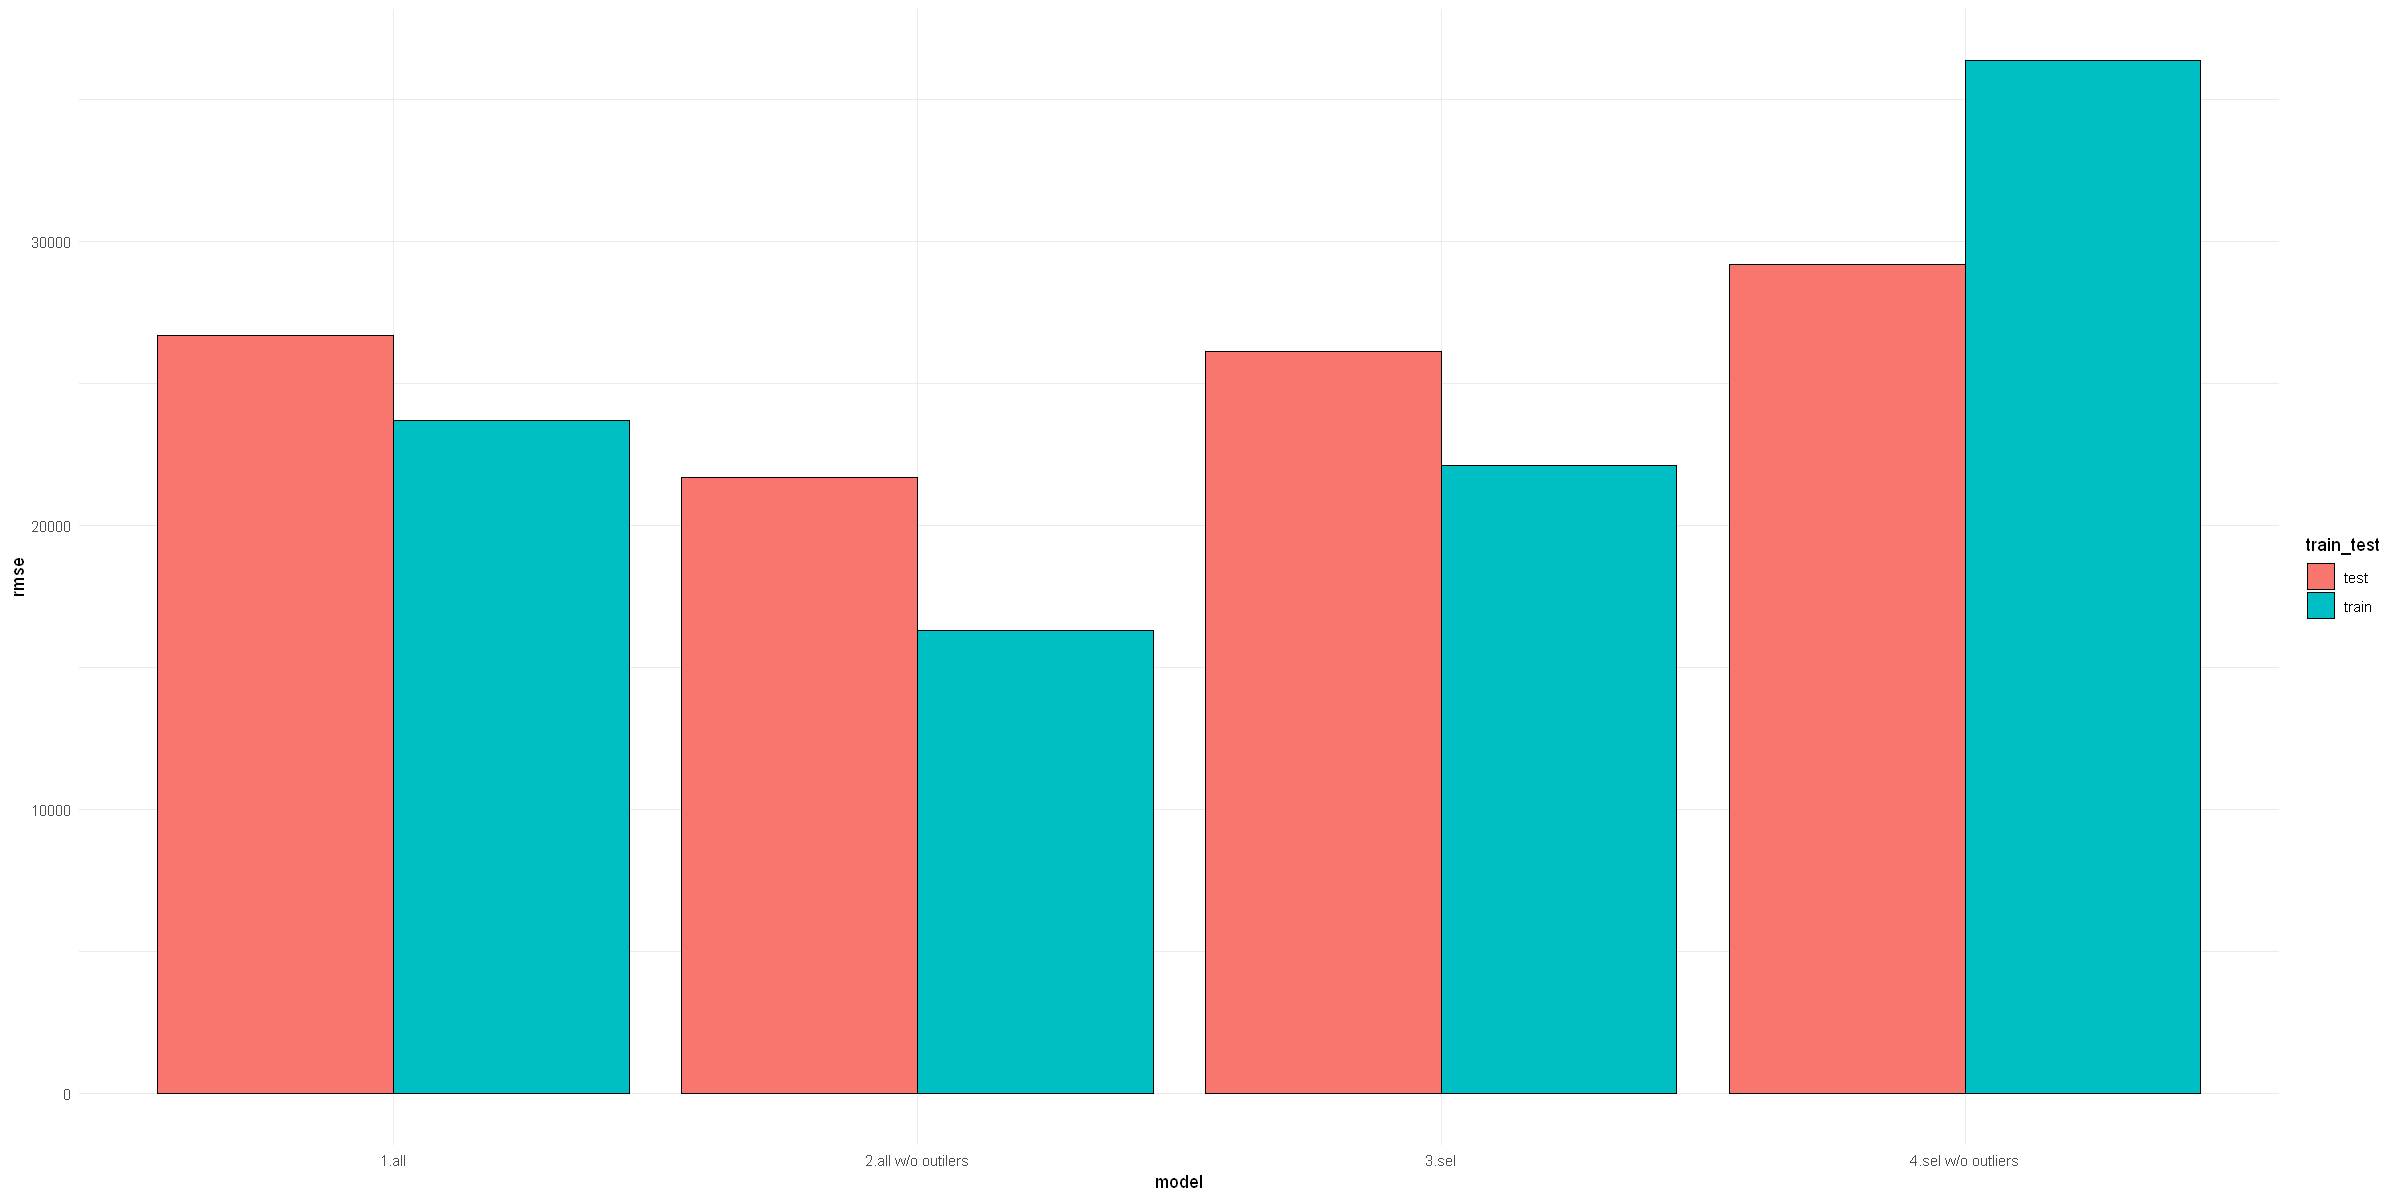

In [123]:
ggplot(data=resultats, aes(x=model, y=rmse, fill=train_test)) +
geom_bar(stat="identity", color="black", position=position_dodge()) + theme_minimal()

aptitude à généraliser et meilleurs rmse pour le choix


# Discussion
- factorisation du code
- régularization
- ouverture à d'autres modèles tree-based & ensembliste, NN
- ici si besoin d'explicabilité reg lin intéressante mais nécessite plus de feat eng.
- pour améliorer: plus de data, plus de feat eng., comparer de nouveaux modèles...

to do
- enlever les outliers du testt !!
- scale !!

In [ ]:
for (colName in names(train[,unlist(lapply(train, is.numeric))])) {
            if(colName != 'SalePrice') {
                # Scale this column (scale() function applies z-scaling).
                train[,colName] <- scale(train[,colName])
            }
    }